# Dataset Description

This notebook will be the submission for my final project. The notebook analysis my selected dataset and looks at various trends and pattersn within the dataset.

The dataset I will be using for this poject is called
Rice (Cammeo and Osmancik)

This dataset consists of morphological measurements of 3,810 rice grains from two species grown in Turkey called Osmancik and Cammeo. The dataset includes seven features for each grain, which describe its shape and size. They are listed along with their descriptions below:

Area: The number of pixels within the grain's boundary.

Perimeter: The distance around the grain's boundary.

Major_Axis_Length: The longest line that can be drawn within the grain.

Minor_Axis_Length: The shortest line that can be drawn within the grain.

Eccentricity: A measure of how elliptical or less round the grain is.

Convex_Area: The pixel count of the grain's convex hull

Extent: The ratio of the grain's area to the bounding box that encloses it.

The target variable, Class, identifies between the two species. This dataset is typically used for classification tasks to distinguish between the two rice species based on their morphological features.

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# metadata
print(rice_cammeo_and_osmancik.metadata)

# variable information
print(rice_cammeo_and_osmancik.variables)
print(y)

{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'ID': 276, 'type': 'NATIVE', 'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'venue': 'International Journal of Intel

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
# sklearn provides manipulation of training sets
# here we do train/test split
from sklearn.model_selection import train_test_split

In [ ]:
# setup
!pip install treeviz

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt
import random



In [ ]:
#Concatenate X and y valiables and save as one df
data_df = pd.concat([X, y], axis=1)
data_df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


Our main analysis questions fo this poject is going to be:

How well can the seven morphological features differentiate between the Cammeo and Osmancik rice species?

Can a machine learning model accurately predict the species of a rice grain based on the seven morphological features?

What is the accuracy of various classification algorithms in predicting the species?

In [ ]:
#Helps us to better understand our data by checking datatypes. We can change data types as needed in order to do our analysis
data_df.dtypes
#Our data looks good so we will keep it as is

,0
Area,int64
Perimeter,float64
Major_Axis_Length,float64
Minor_Axis_Length,float64
Eccentricity,float64
Convex_Area,int64
Extent,float64
Class,object


In [ ]:
#Missing Value Count.
data_df.isnull().sum()
#There are no missing values

,0
Area,0
Perimeter,0
Major_Axis_Length,0
Minor_Axis_Length,0
Eccentricity,0
Convex_Area,0
Extent,0
Class,0


In [ ]:
#Show number of rows ansd columns in a dataset. In this dataset thee ae 3810 ows and 8 columns
data_df.shape

(3810, 8)

In [ ]:
#Functions descibes all of the variables in this dataset. They are all numerical except for the target variable which is categorical
data_df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [ ]:
#Identify features in the dataset
rice_features= data_df.drop('Class', axis=1) # drop the target column

In [ ]:
target = data_df.Class

## Data Analysis

<Axes: xlabel='Class', ylabel='count'>

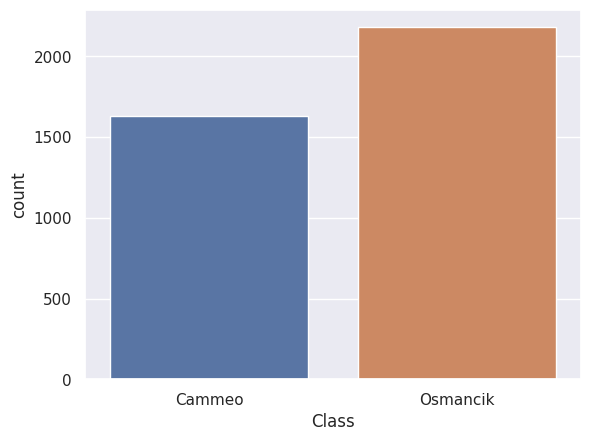

In [ ]:
#Barplot of count for each class
sns.countplot(x = 'Class', hue= 'Class', data=data_df)

<Axes: xlabel='Area', ylabel='Count'>

<Axes: xlabel='Perimeter', ylabel='Count'>

<Axes: xlabel='Major_Axis_Length', ylabel='Count'>

<Axes: xlabel='Minor_Axis_Length', ylabel='Count'>

<Axes: xlabel='Convex_Area', ylabel='Count'>

<Axes: xlabel='Extent', ylabel='Count'>

<Axes: xlabel='Eccentricity', ylabel='Count'>

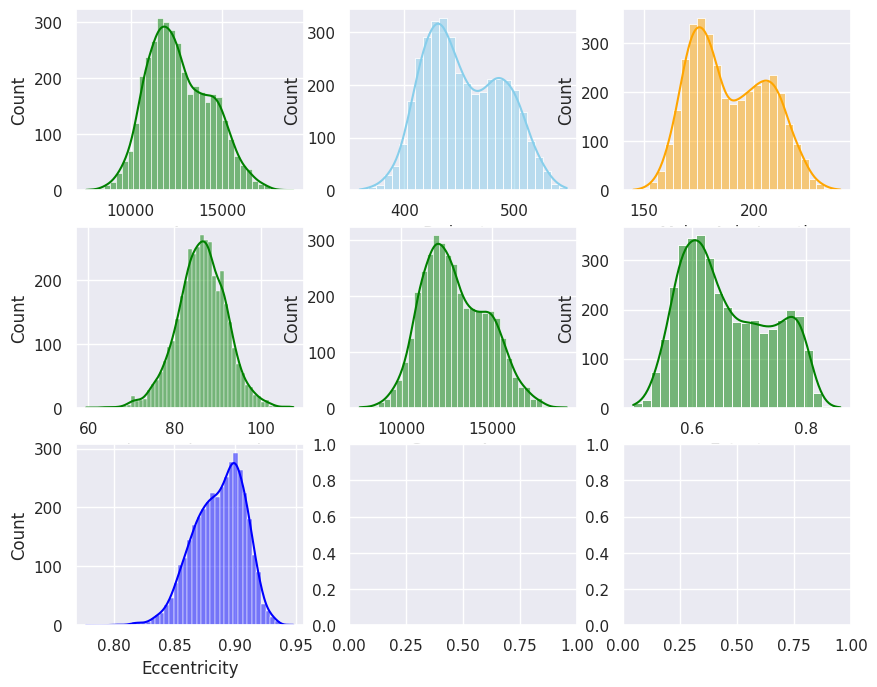

In [ ]:
#Creates histograms for evey numerical varibales in the dataset
sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 3, figsize=(10, 8))

sns.histplot(data=data_df, x="Area", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data_df, x="Perimeter", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=data_df, x="Major_Axis_Length", kde=True, ax=axs[0, 2], color='orange')
sns.histplot(data=data_df, x="Minor_Axis_Length", kde=True, ax=axs[1, 0], color='green')
sns.histplot(data=data_df, x="Convex_Area", kde=True, ax=axs[1, 1], color='green')
sns.histplot(data=data_df, x="Extent", kde=True, ax=axs[1, 2], color='green')
sns.histplot(data=data_df, x="Eccentricity", kde=True, ax=axs[2, 0], color ='blue')

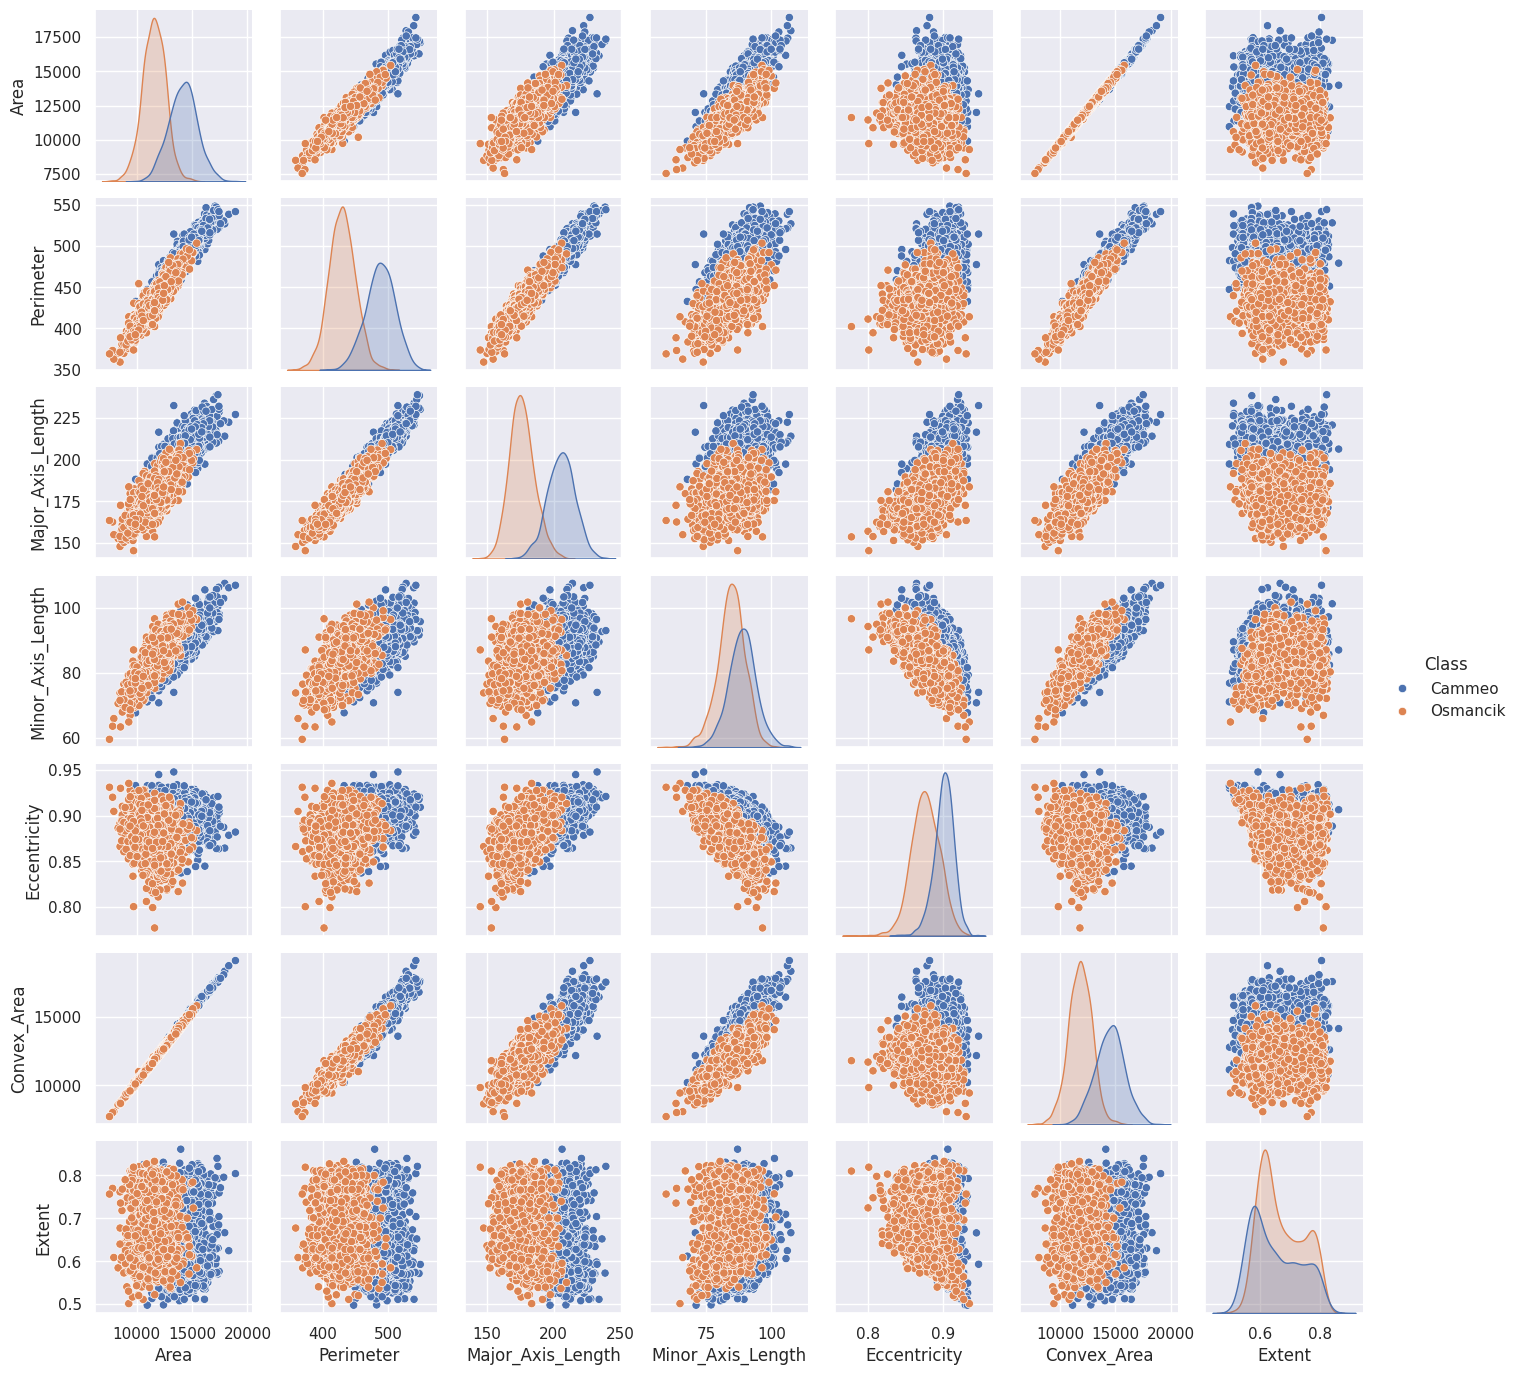

In [ ]:
#Shows corelation between all vaiables
sns.set()
sns.pairplot(data_df, hue= 'Class', height=2, palette="deep")

The Cammeo bean is represented by the orange color while the Osmancik bean is represnted by the blue color. Some of these grapghs are easily distingishibale as we can see how each variable effects each bean such as our area and convex area graph while pthers like extent and eccentricity gragh don't provide any useful information or correlations that we can use to help with our analysis.

Text(0.5, 0.98, 'Box plot with Rice data')

<Axes: xlabel='Class', ylabel='Area'>

<Axes: xlabel='Class', ylabel='Perimeter'>

<Axes: xlabel='Class', ylabel='Major_Axis_Length'>

<Axes: xlabel='Class', ylabel='Minor_Axis_Length'>

<Axes: xlabel='Class', ylabel='Eccentricity'>

<Axes: xlabel='Class', ylabel='Convex_Area'>

<Axes: xlabel='Class', ylabel='Extent'>

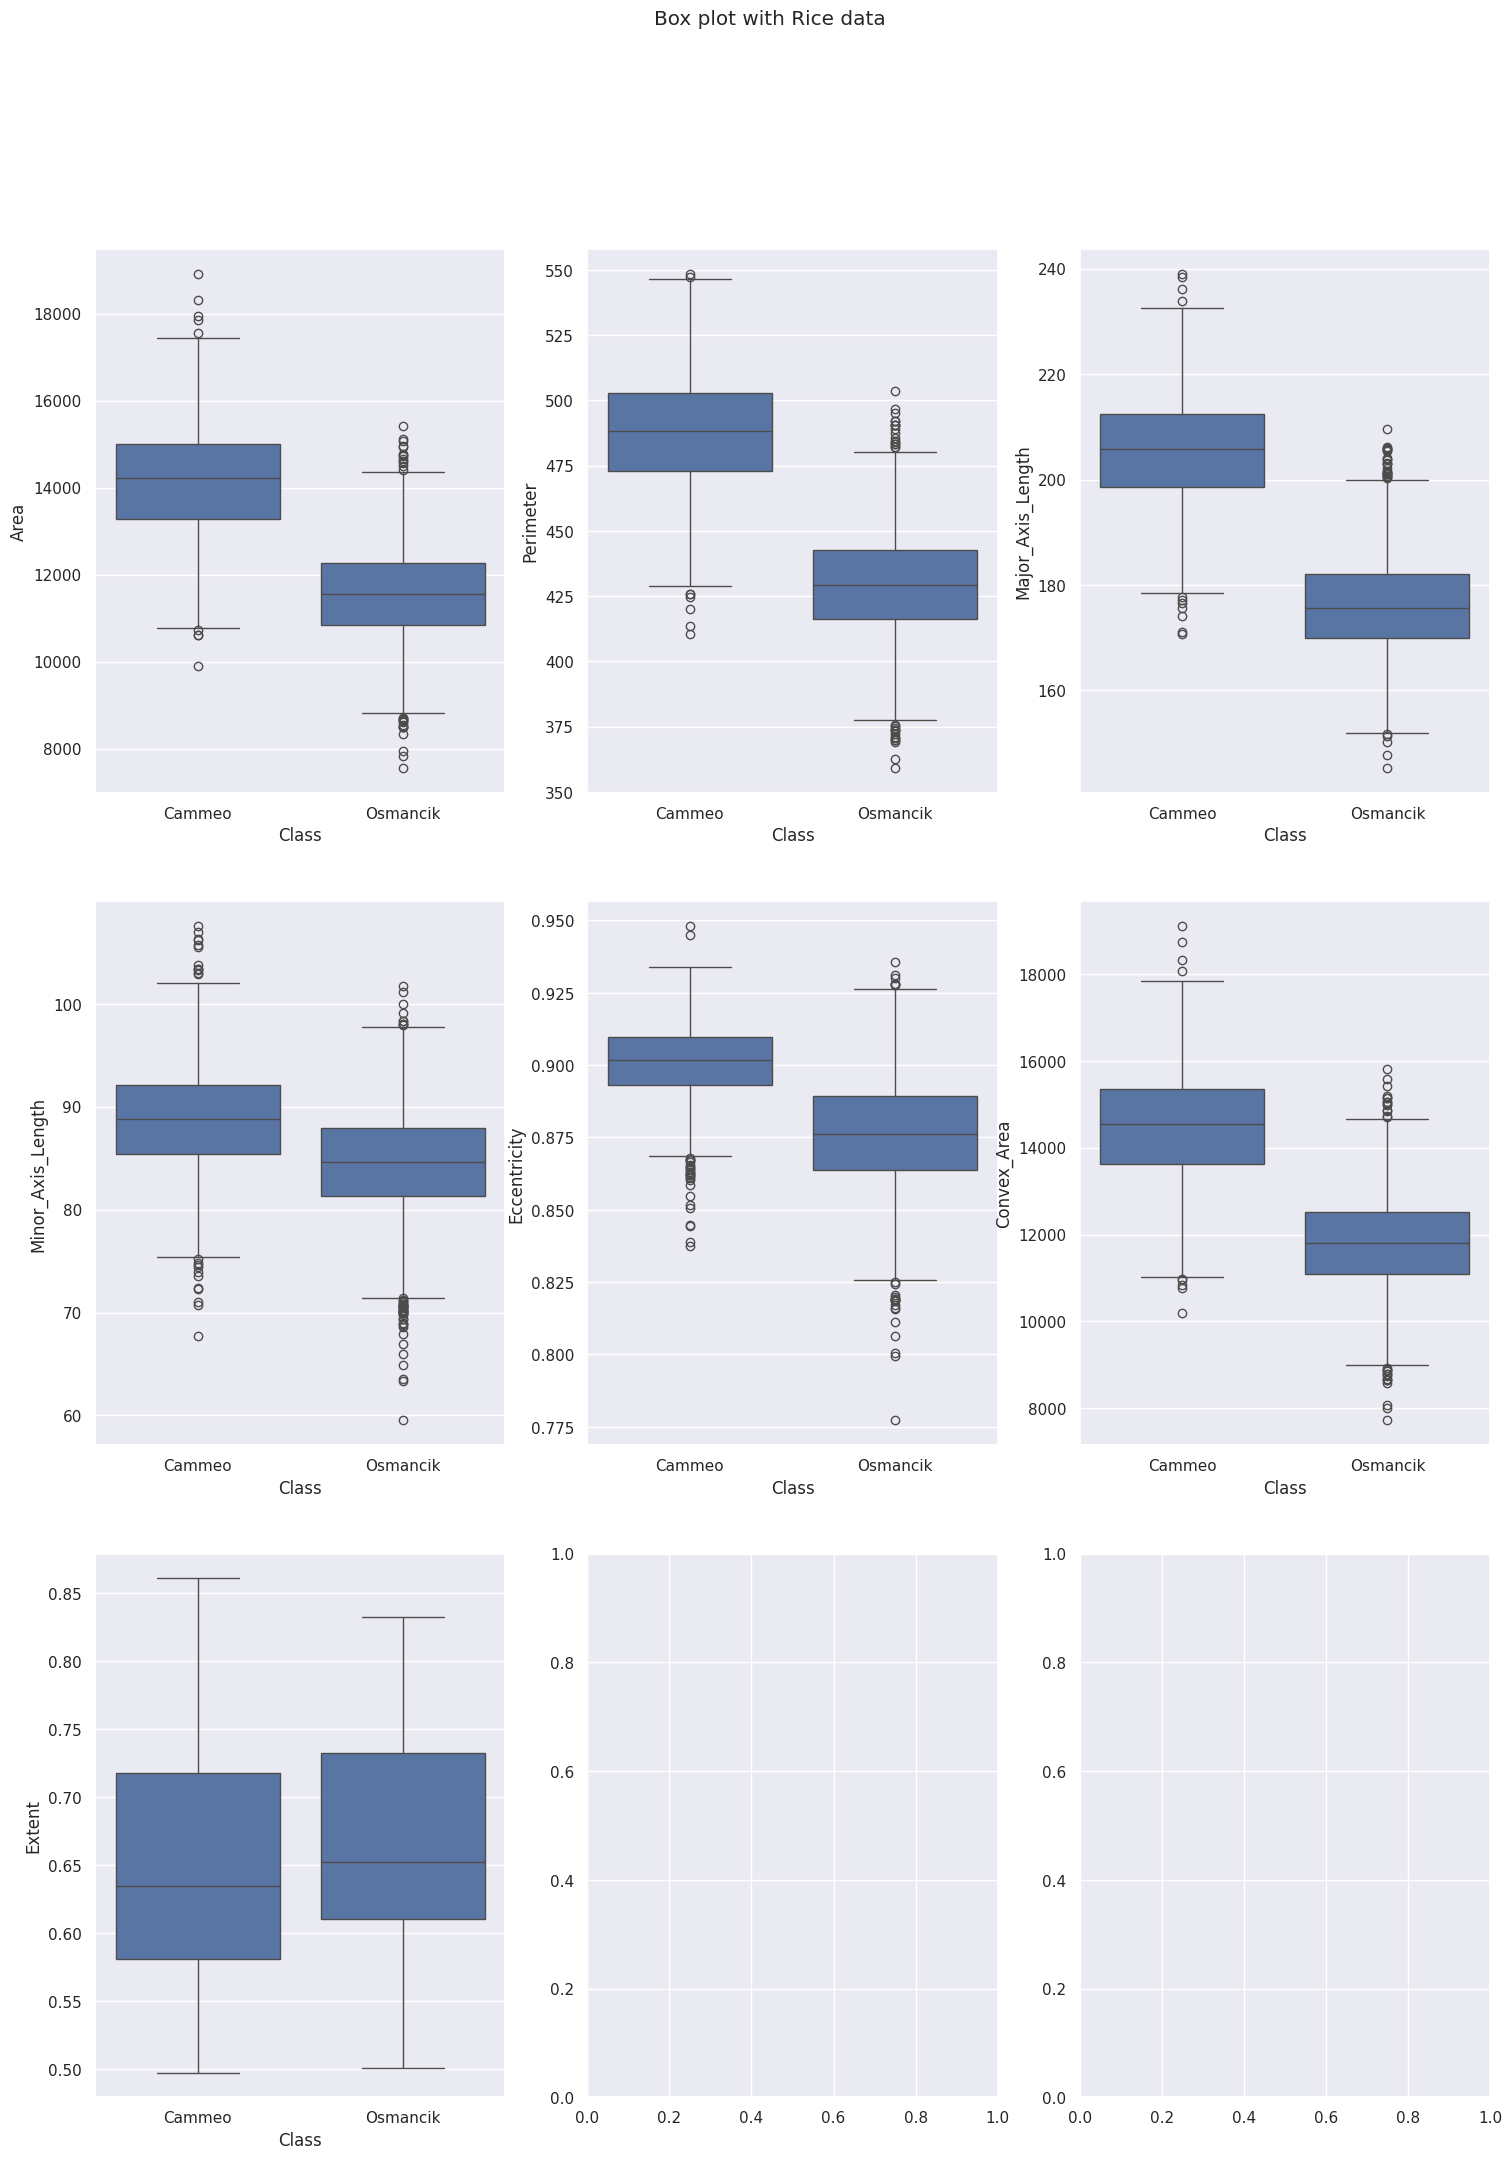

In [ ]:
# Geneated below is a boxplot matix which compares the feature vaiables to the two classes of bean types. We can use it to determine which
#features most significantly impact the classification of bean type

fig, axes = plt.subplots(3, 3, figsize=(18, 24)) #How many plot? What Size?
fig.suptitle('Box plot with Rice data') # Title of the graph

sns.boxplot(ax=axes[0, 0], data=data_df, x='Class', y='Area') #boxplot of the diagnosis wrt radius
sns.boxplot(ax=axes[0, 1], data=data_df, x='Class', y='Perimeter')
sns.boxplot(ax=axes[0, 2], data=data_df, x='Class', y='Major_Axis_Length')
sns.boxplot(ax=axes[1, 0], data=data_df, x='Class', y='Minor_Axis_Length')
sns.boxplot(ax=axes[1, 1], data=data_df, x='Class', y='Eccentricity')
sns.boxplot(ax=axes[1, 2], data=data_df, x='Class', y='Convex_Area')
sns.boxplot(ax=axes[2, 0], data=data_df, x='Class', y='Extent')

This boxplot really helps us to visualize which how each variable can help us to classify each type of rice grain. For example we can see that the cammeo rice grain has a way higher perimeter than the osmancik class which can help us to distinguish between the two.

# Model Interpretation

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [ ]:
from sklearn.model_selection import train_test_split
#Let's split our data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(rice_features, target, test_size=0.2, shuffle=True, random_state=42)


In [ ]:
#Import accuracy score and balanced accuracy score from model metrics package
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, balanced_accuracy_score

def model_metrics(y_true, y_predict):
  accuracy= accuracy_score(y_true, y_predict)
  precision=precision_score(y_true, y_predict, average='micro')
  recall=recall_score(y_true, y_predict, average='micro')
  f1=f1_score(y_true, y_predict, average='micro')
  balanced_accuracy=balanced_accuracy_score(y_true, y_predict)
  return [accuracy, precision, recall, f1, balanced_accuracy]

In [ ]:
#Let's visualize our data with a decision tree. Lets create the classier and print out our training and testing accuaracy
#
dtree_high = tree.DecisionTreeClassifier(criterion='entropy', max_depth = None, random_state=42)
dtree_high.fit(X_train, y_train)
pred_train_high = dtree_high.predict(X_train)
pred_test_high = dtree_high.predict(X_test)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, pred_train_high)))
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test_high)))


DecisionTreeClassifier(criterion='entropy', random_state=42)

Train Accuracy: 1.00
Test Accuracy: 0.89


[Text(0.4855943738656987, 0.9814814814814815, 'Major_Axis_Length <= 190.363\nentropy = 0.981\nsamples = 3048\nvalue = [1280, 1768]\nclass = Osmancik'),
 Text(0.18562840290381125, 0.9444444444444444, 'Major_Axis_Length <= 181.237\nentropy = 0.282\nsamples = 1715\nvalue = [84, 1631]\nclass = Osmancik'),
 Text(0.33561138838475496, 0.962962962962963, 'True  '),
 Text(0.06715063520871144, 0.9074074074074074, 'Major_Axis_Length <= 170.776\nentropy = 0.076\nsamples = 1290\nvalue = [12, 1278]\nclass = Osmancik'),
 Text(0.05989110707803993, 0.8703703703703703, 'entropy = 0.0\nsamples = 513\nvalue = [0, 513]\nclass = Osmancik'),
 Text(0.07441016333938294, 0.8703703703703703, 'Major_Axis_Length <= 170.794\nentropy = 0.115\nsamples = 777\nvalue = [12, 765]\nclass = Osmancik'),
 Text(0.06715063520871144, 0.8333333333333334, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Cammeo'),
 Text(0.08166969147005444, 0.8333333333333334, 'Major_Axis_Length <= 178.435\nentropy = 0.107\nsamples = 776\nvalu

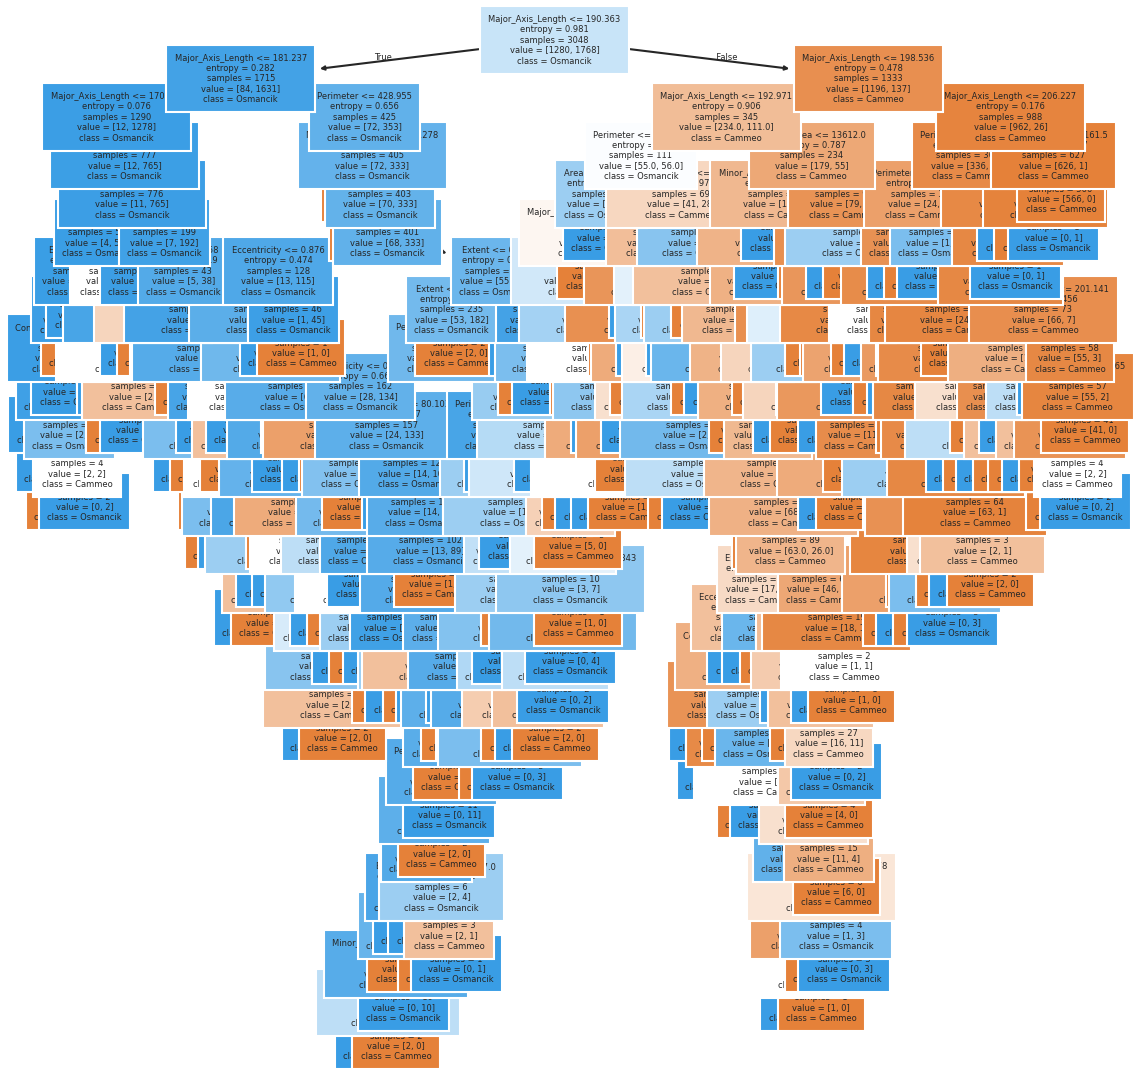

In [ ]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9,9), dpi=150)
plot_tree(dtree_high, fontsize=4, filled=True,
               max_depth=None,
               feature_names= rice_features.columns,
               class_names= ['Cammeo','Osmancik'])

This decision tree has a training score of 1.00 and a testing score of 0.89. These numbers are very high suggesting that our model is overfitting. Let's use a grid search to find the best parameters for our decisison tree. This tree is also very messy so it won't be much help to our anlysis anyway.

In [ ]:
# Grid search with cross-validation for wisconsin breast cancer dataset
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

# setting up grid search
model = tree.DecisionTreeClassifier()
param_grid = {
    'max_depth': list(range(1,11)), # search 1..10
    'criterion': ['entropy', 'gini']
    }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(X_train, y_train)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

Best parameters: {'criterion': 'gini', 'max_depth': 1}


In [ ]:
#This defines the best paramters tree classifer and prints out the accuracy scores of our new tree
dtree_best = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state=42)
dtree_best.fit(X_train, y_train)
pred_train_best = dtree_best.predict(X_train)
pred_test_best = dtree_best.predict(X_test)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, pred_train_best)))
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test_best)))

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

Train Accuracy: 0.93
Test Accuracy: 0.93


[Text(0.42, 0.9, 'Major_Axis_Length <= 190.363\nentropy = 0.981\nsamples = 3048\nvalue = [1280, 1768]\nclass = Osmancik'),
 Text(0.16, 0.7, 'Major_Axis_Length <= 181.237\nentropy = 0.282\nsamples = 1715\nvalue = [84, 1631]\nclass = Osmancik'),
 Text(0.29, 0.8, 'True  '),
 Text(0.08, 0.5, 'Major_Axis_Length <= 170.776\nentropy = 0.076\nsamples = 1290\nvalue = [12, 1278]\nclass = Osmancik'),
 Text(0.04, 0.3, 'entropy = 0.0\nsamples = 513\nvalue = [0, 513]\nclass = Osmancik'),
 Text(0.12, 0.3, 'Major_Axis_Length <= 170.794\nentropy = 0.115\nsamples = 777\nvalue = [12, 765]\nclass = Osmancik'),
 Text(0.08, 0.1, '\n  (...)  \n'),
 Text(0.16, 0.1, '\n  (...)  \n'),
 Text(0.24, 0.5, 'Perimeter <= 428.955\nentropy = 0.656\nsamples = 425\nvalue = [72, 353]\nclass = Osmancik'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 20\nvalue = [0, 20]\nclass = Osmancik'),
 Text(0.28, 0.3, 'Major_Axis_Length <= 181.278\nentropy = 0.675\nsamples = 405\nvalue = [72, 333]\nclass = Osmancik'),
 Text(0.24, 0.1, '\

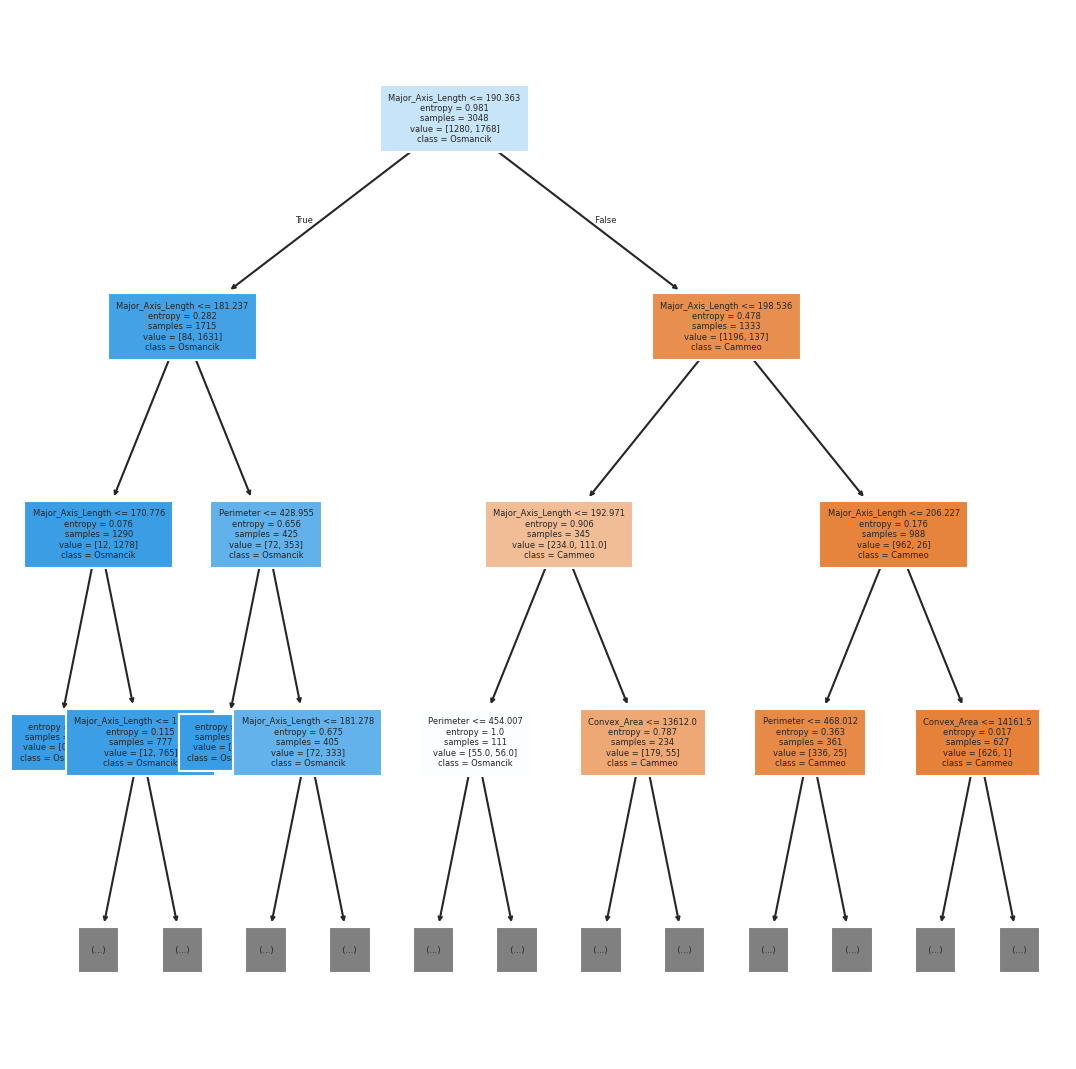

In [ ]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9,9), dpi=150)
plot_tree(dtree_high, fontsize=4, filled=True,
               max_depth=3,
               feature_names= rice_features.columns,
               class_names= ['Cammeo','Osmancik'])

This tree is far more accurate as it gives us a testing and training accuracy of 0.93 for both measures. While this tree isn't perfectly accurate, it is very well trained and for the most part will classify any given bean in the dataset fairly accurately.

In [ ]:
import plotly.graph_objects as go

def plot_bar_results(dataset_type, all_metrics_values):
    fig = go.Figure()
    for model_name, metrics_df in all_metrics_values.items():
        metrics_names = list(metrics_df.columns)
        values = metrics_df.loc[dataset_type].to_numpy()
        fig.add_trace(go.Bar(y=values, x=metrics_names, name=model_name))
    fig.update_layout(barmode="group", xaxis_tickangle=-45, title_text=dataset_type+" Dataset")
    fig.show()

In [ ]:
#calculate the model metrics by comparing the true training target and the predicted values of high complexity tree
HCtree_train_metrics= model_metrics(y_train, pred_train_high)
#calculate the model metrics by comparing the true testing target and the predicted values of high complexity tree
HCtree_test_metrics = model_metrics(y_test, pred_test_high)

#calculate the model metrics by comparing the true training target and the predicted values of best parameters tree
BPtree_train_metrics= model_metrics(y_train, pred_train_best)
#calculate the model metrics by comparing the true testing target and the predicted values of best parameters tree
BPtree_test_metrics = model_metrics(y_test, pred_test_best)

In [ ]:
#Here we can see a side-by-side comparison of the model metrics of the high complexity tree and the best parameters tree.
df_tree = pd.DataFrame([ HCtree_train_metrics, HCtree_test_metrics],  columns=['Accuracy', 'Pecision', 'Recall', 'F1 score', 'Balanced accuracy'],
                      index =['Train', 'Test'] )
df_best_tree = pd.DataFrame([ BPtree_train_metrics, BPtree_test_metrics],  columns=['Accuracy', 'Pecision', 'Recall', 'F1 score', 'Balanced accuracy'],
                      index =['Train', 'Test'] )
BothTree_metrics_values={"High Complexity": df_tree,"Best Parameters": df_best_tree}
BothTree_metrics_values

{'High Complexity':        Accuracy  Pecision    Recall  F1 score  Balanced accuracy
 Train  1.000000  1.000000  1.000000  1.000000           1.000000
 Test   0.887139  0.887139  0.887139  0.887139           0.885742,
 'Best Parameters':        Accuracy  Pecision    Recall  F1 score  Balanced accuracy
 Train  0.933071  0.933071  0.933071  0.933071           0.932065
 Test   0.929134  0.929134  0.929134  0.929134           0.928662}

In [ ]:
#Here we can visulize the performance of the training data from the original decicion tree and best paramters tree. It is clear by this visulization that
#the first decision tree we created is overfitting
plot_bar_results("Train", BothTree_metrics_values)

In [ ]:
#Here we can visulize the performance of the testing data of the original decicion tree and best paramters tree. It is clear by this visulization that
#the first decision tree we created is overfitting
plot_bar_results("Test", BothTree_metrics_values)

Using this plot we can clearly visualize how the high complexity decisison tree is overfitting in every metric compared to the best paramters tree.

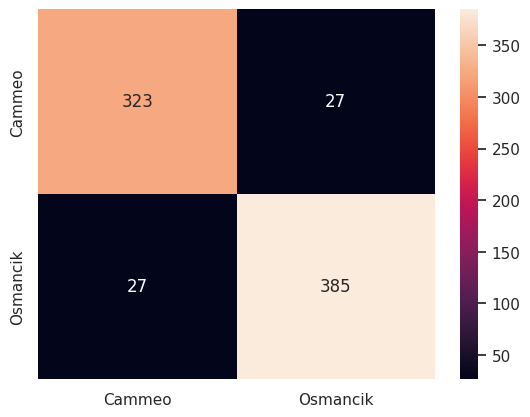

In [ ]:
# build and print the confusion matrix of the best parameters decicion tree classifier
labels= list(target.unique())
cm = confusion_matrix(y_test, pred_test_best, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
f = sns.heatmap(cm_df, annot=True, fmt='d')

Here is a confusion matrix generated based on our best paramters decicion tree.
The confusion matrix indicates strong classification performance. Out of 762 total instances, the model correctly classified 708 cases summing to 323 true positives and 385 true negative as well as achieving an overall accuracy of
92.9%. We ended up with the same number of false negatives and false postivies as the with 27 of each.

In [ ]:
# compute 95% confidence intervals for classification and regression
# problems

def classification_confint(acc, n):
    '''
    Compute the 95% confidence interval for a classification problem.
      acc -- classification accuracy
      n   -- number of observations used to compute the accuracy
    Returns a tuple (lb,ub)
    '''
    import math
    interval = 1.96*math.sqrt(acc*(1-acc)/n)
    lb = max(0, acc - interval)
    ub = min(1.0, acc + interval)
    return (lb,ub)

def regression_confint(rs_score, n, k):
    '''
    Compute the 95% confidence interval for a regression problem.
      rs_score -- R^2 score
      n        -- number of observations used to compute the R^2 score
      k        -- number of independent variables in dataset
    Returns a tuple (lb,ub)
    Reference:
    https://books.google.com/books?id=gkalyqTMXNEC&pg=PA88#v=onepage&q&f=false
    '''
    import math
    interval = 2*math.sqrt((4*rs_score*(1-rs_score)**2*(n-k-1)**2)/((n**2 - 1)*(n+3)))
    lb = max(0, rs_score - interval)
    ub = min(1.0, rs_score + interval)
    return (lb,ub)

In [ ]:
#This prints out the confidence interval of our best parameters decicicon tree (93%)along with the range(91%-95%)
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# fit the model on the training set of data
dtree_best.fit(X_train, y_train)

# Test results: evaluate the model on the testing set of data
y_test_model = dtree_best.predict(X_test)
acc = accuracy_score(y_test, y_test_model)
observations = X_test.shape[0]
lb,ub = classification_confint(acc, observations)
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

Accuracy: 0.93 (0.91,0.95)


In [ ]:
# Split the dataset (80% for train set and 20% in test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
def balanced_accuracy_score(model, X_train, X_test, y_train):
  from sklearn.metrics import balanced_accuracy_score

  model.fit(X_train, y_train)
  # Prediction using Testing data
  pred_test = model.predict(X_test)
  #calculate the balanced accuracy by comparing the true testing target and the predicted values
  return balanced_accuracy_score(y_test, pred_test)

In [ ]:
#Next let's create a XGP Boost model and a RandomForest model to see how they compare to our decision tree. We will need to edit the dataset a little bit before we can create this models.
#Let's check the data type of our target variable again.
print(data_df['Class'].dtype)

object


In [ ]:
#Copy the dataframe and change class values to 0 and 1
copied_data_df = data_df.copy()
copied_data_df['Class'] = copied_data_df['Class'].replace(['Cammeo','Osmancik'], [0,1])

<ipython-input-268-a9ffd3a56d68>:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
X  = copied_data_df
y = copied_data_df['Class']


In [ ]:
#From the model selection library import the function for splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

# Split the dataset (80% for train set and 20% in test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
import xgboost
# import kFold and cross validation score
from sklearn.model_selection import KFold, cross_val_score

# XGBClassifier
xgb = xgboost.XGBClassifier(random_state=42)

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

scores = cross_val_score(xgb, X_train, y_train,cv=cv)

print("Fold Accuracies: {}".format(scores))
xgb_mean_score=scores.mean()
xgb_balanced_acc=balanced_accuracy_score(xgb, X_train, X_test, y_train)

Fold Accuracies: [1. 1. 1. 1. 1.]


In [ ]:
#Let's also create a Random Forest Model and see how it compares to the xgboost model
# import kFold and cross validation score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions on train and test data
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

scores = cross_val_score(rf, X_train, y_train,cv=cv)

print("Fold Accuracies: {}".format(scores))
rf_mean_score=scores.mean()
rf_balanced_acc=balanced_accuracy_score(rf, X_train, X_test, y_train)

RandomForestClassifier(random_state=42)

Fold Accuracies: [1. 1. 1. 1. 1.]


Lets compute the 95% confidence interval for the XGboost model and the Random Forest model

In [ ]:
acc_scores = pd.DataFrame([ [xgb_mean_score, xgb_balanced_acc],[rf_mean_score, rf_balanced_acc] ],  columns=['Mean Accuracy', 'Balanced accuracy'],
                      index =['XGBoost', 'Random Forest',] )
acc_scores

,Mean Accuracy,Balanced accuracy
XGBoost,1.0,1.0
Random Forest,1.0,1.0


Both the XGBoost and Random Forest models achieved a perfect fold accuracy of 1.0 when applied to our dataset, indicating flawless classification during cross-validation. While This performance suggests that the models were highly effective in distinguishing between the two rice species based on the faeture variables, it raises the possibility of overfitting which occurs when a model becomes too tailored to the training data, capturing noise or learning patterns that will make it perform poorly when given a brand new species of rice grain. Overall, the best model we have created would still be our best paramters decicion tree as it avoids overfitting and makes predictions most accuratley based on the training data.

Since our Random Forest and XGBoost models weren't a good fit, lets try to create a KNN model and compare it to our high functioning Descicion Tree.

In [ ]:
#Let's split our data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(rice_features, target, test_size=0.2, shuffle=True, random_state=42)

# set up the model with k=3
model = KNeighborsClassifier(n_neighbors=3)
# KNN
model = KNeighborsClassifier()

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

# grid search
param_grid = {'n_neighbors': list(range(1,26))}
grid = GridSearchCV(model, param_grid, cv=cv)

# performing grid search
grid.fit(X_train, y_train)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
pred_test = grid.best_estimator_.predict(X_test)
acc = accuracy_score(y_test, pred_test)
lb,ub = classification_confint(acc,X_test.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25]})

Grid Search: best parameters: {'n_neighbors': 25}
Accuracy: 0.89 (0.87,0.91)


In [ ]:
# build the confusion matrix
labels = list(target.unique())
cm = confusion_matrix(y_true= y_test,y_pred= pred_test, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Confusion Matrix:
          Cammeo  Osmancik
Cammeo       292        58
Osmancik      27       385


For the KNN model, we saw that we recieved a confidence interval of 89% with range of (86%-91%). Since this is close to the accuracy of the decicion tree, I created a confusion matrix of the KNN to see which one really perfomrs better. In the visulization above we can see that the model misclassified 58 Cammeo grains and 27 Osmancik grains. Overall, this model perfroms similarly to the decicion tree but overall we will choose to use the decicion tree model because it performs slightly better as it only misclassied each rice grain in 27 instances.

#Checking For Bias

In [ ]:
# Split the dataset (80% for train set and 20% in test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
# Prediction using Training data
pred_train = rf.predict(X_train)
# Prediction using Testing data
pred_test = rf.predict(X_test)

In [ ]:

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = data_df.drop(columns = ['Class']).copy()
y = data_df['Class']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data).
# we have to define valid_size=0.5 (that is 50% of remaining data)

test_size = 0.5
X_val_, X_test_, y_val_, y_test_ = train_test_split(X_rem,y_rem, test_size=0.5)

print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_valid',X_val_.shape)
print('y_valid',y_val_.shape)
print('X_test',X_test_.shape)
print('y_test',y_test_.shape)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the train size
train_size = 0.8

# Separate features and target variable
X = data_df.drop(['Class'], axis=1)
y = data_df['Class']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, random_state=42)

# Split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create and train the logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Validate the model using the validation data
y_val_pred = lr.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print('Validation Accuracy:', val_accuracy)

# Test the model using the test data
y_test_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test Accuracy:', test_accuracy)

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_test_pred))




LogisticRegression(max_iter=1000, random_state=42)

Validation Accuracy: 0.9343832020997376
Test Accuracy: 0.9238845144356955
Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.94      0.88      0.91       173
    Osmancik       0.91      0.96      0.93       208

    accuracy                           0.92       381
   macro avg       0.93      0.92      0.92       381
weighted avg       0.92      0.92      0.92       381



We have created a LogisticRegression model in order to indicate bias in our data. the model is performing well, but we can see the difference in precision and recall between the two groups indicates that the model seems to be biased towards the Osmancik group which is the unprivillaged class. We can see this in the logistic regression model as the f-score for the osmancik class was 0.93 and the f-score for the cammeo class was only 0.91 showing that the dataset favors the osmancik class. This is most likely due to the imbalance in the dataset which we saw earlier on as there is many more instances of the osmancik class than the cammeo class in the dataset. therefore, our data is biased towards the osmancik class.

# Conclusion

In this analysis of the Rice (Cammeo and Osmancik) dataset, we successfully explored the dataset's features, visualized relationships, and built machine learning models to classify rice grains based on morphological measurements. Key insights and findings include:

The dataset was clean with no missing values, and exploratory data analysis revealed distinct distributions for the features across the two rice species. We created visualizations such as histograms, boxplots, and pairplots in order to highlight the differences in features like Area, Perimeter, and Eccentricity.

An initial high-complexity decision tree model achieved perfect training accuracy but exhibited overfitting with reduced test accuracy 89%.
After using grid search, we discovered the optimal decision tree parameters allowing us to create a model with a much more balanced training and test performance, oerall achieving an accuracy of 93% with confidence intervals ranging between 91% and 95%.

Through this ananlysis, I discoered that features such as Major_Axis_Length,Perimeter, and Convex_Area were the most significant contributors to distinguishing between the rice species.

We also discovered that there was bias in our dataset as the osmancik class scored a higher f-score than the cammeo class which signifies that there is some bias in our dataset.

To conclude, this project demonstrates how machine learning can effectively classify biological specimens based on morphological features. Overall, this analysis highlights the importance of feature selection, data visualization, and model optimization in achieving reliable predictive results.

